In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy import linalg
import os
from sklearn.utils import resample
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import random
import ast
from functools import reduce

In [2]:
import tqdm

In [3]:
dis_male = pd.read_csv('disclosed_male.csv',sep='|')

In [269]:
dis_male.columns

Index(['Upvotes', 'Downvotes', 'Rating', 'Timestamp', 'Review_length',
       'Grade_level', 'overall_sentiment', 'categories'],
      dtype='object')

In [270]:
dis_female = pd.read_csv('disclosed_female.csv',sep='|')

In [271]:
dis_female.columns

Index(['Upvotes', 'Downvotes', 'Rating', 'Timestamp', 'Review_length',
       'Grade_level', 'overall_sentiment', 'categories'],
      dtype='object')

In [295]:
undis_male = pd.read_csv('undisclosed_male.csv',sep='|')

In [296]:
undis_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.357603e+09,53.0,9.0,0.8674,"[['Clothing, Shoes & Jewelry', 'Shoes & Access..."
1,1.0,0.0,3.0,1.359677e+09,113.0,42.0,0.9155,"[['Clothing, Shoes & Jewelry', 'Shoes & Access..."
2,0.0,0.0,4.0,1.353110e+09,53.0,4.0,0.8316,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."
3,1.0,0.0,2.0,1.350000e+09,176.0,9.0,0.2074,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."
4,0.0,0.0,2.0,1.359072e+09,49.0,5.0,0.9022,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."


In [276]:
undis_female = pd.read_csv('undisclosed_female.csv',sep='|')

In [8]:
undis_male.columns

Index(['Upvotes', 'Downvotes', 'Rating', 'Timestamp', 'Review_length',
       'Grade_level', 'overall_sentiment', 'categories'],
      dtype='object')

In [21]:
cat = undis_male.iloc[0]['categories'].replace('[','').replace(']','').replace('\'','').split(',')

In [273]:
def getCategoryList(x):
    return reduce(lambda a,b:a+b,ast.literal_eval(x))

In [54]:
undis_male = undis_male.drop(columns=['category'])

In [55]:
undis_male.iloc[0]['categories']

['Clothing, Shoes & Jewelry',
 'Shoes & Accessories: International Shipping Available',
 'Clothing, Shoes & Jewelry',
 'O',
 'Osiris',
 'Clothing, Shoes & Jewelry',
 'Street, Surf & Skate',
 'Clothing, Shoes & Jewelry',
 'Men',
 'Shoes',
 'Fashion Sneakers',
 'Clothing, Shoes & Jewelry',
 'Men',
 'Shoes',
 'Athletic',
 'Skateboarding']

In [277]:
undis_female = undis_female.rename(columns={'categories':'category'})

In [278]:
undis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,category
0,0.0,0.0,5.0,1.404086e+09,2.0,15.0,0.4404,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
1,0.0,1.0,4.0,1.365725e+09,24.0,4.0,0.6597,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
2,0.0,0.0,2.0,1.398038e+09,68.0,4.0,0.9571,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
3,1.0,1.0,1.0,1.367539e+09,165.0,6.0,0.9241,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
4,0.0,0.0,5.0,1.395101e+09,21.0,8.0,0.8020,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."


In [279]:
undis_female['categories'] = undis_female['category'].apply(lambda x:getCategoryList(x))

In [280]:
undis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,category,categories
0,0.0,0.0,5.0,1.404086e+09,2.0,15.0,0.4404,"[['Home & Kitchen', 'Bedding', 'Comforters & S...","[Home & Kitchen, Bedding, Comforters & Sets, C..."
1,0.0,1.0,4.0,1.365725e+09,24.0,4.0,0.6597,"[['Home & Kitchen', 'Bedding', 'Comforters & S...","[Home & Kitchen, Bedding, Comforters & Sets, C..."
2,0.0,0.0,2.0,1.398038e+09,68.0,4.0,0.9571,"[['Home & Kitchen', 'Bedding', 'Comforters & S...","[Home & Kitchen, Bedding, Comforters & Sets, C..."
3,1.0,1.0,1.0,1.367539e+09,165.0,6.0,0.9241,"[['Home & Kitchen', 'Bedding', 'Comforters & S...","[Home & Kitchen, Bedding, Comforters & Sets, C..."
4,0.0,0.0,5.0,1.395101e+09,21.0,8.0,0.8020,"[['Home & Kitchen', 'Bedding', 'Comforters & S...","[Home & Kitchen, Bedding, Comforters & Sets, C..."


In [281]:
undis_female = undis_female.drop(columns=['category'])

In [297]:
undis_male = undis_male.rename(columns={'categories':'category'})

In [298]:
undis_male['categories'] = undis_male['category'].apply(lambda x:getCategoryList(x))
undis_male = undis_male.drop(columns=['category'])

In [291]:
undis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.404086e+09,2.0,15.0,0.4404,"[Home & Kitchen, Bedding, Comforters & Sets, C..."
1,0.0,1.0,4.0,1.365725e+09,24.0,4.0,0.6597,"[Home & Kitchen, Bedding, Comforters & Sets, C..."
2,0.0,0.0,2.0,1.398038e+09,68.0,4.0,0.9571,"[Home & Kitchen, Bedding, Comforters & Sets, C..."
3,1.0,1.0,1.0,1.367539e+09,165.0,6.0,0.9241,"[Home & Kitchen, Bedding, Comforters & Sets, C..."
4,0.0,0.0,5.0,1.395101e+09,21.0,8.0,0.8020,"[Home & Kitchen, Bedding, Comforters & Sets, C..."


In [292]:
undis_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.357603e+09,53.0,9.0,0.8674,"[Clothing, Shoes & Jewelry, Shoes & Accessorie..."
1,1.0,0.0,3.0,1.359677e+09,113.0,42.0,0.9155,"[Clothing, Shoes & Jewelry, Shoes & Accessorie..."
2,0.0,0.0,4.0,1.353110e+09,53.0,4.0,0.8316,"[Pet Supplies, Fish & Aquatic Pets, Aquarium L..."
3,1.0,0.0,2.0,1.350000e+09,176.0,9.0,0.2074,"[Pet Supplies, Fish & Aquatic Pets, Aquarium L..."
4,0.0,0.0,2.0,1.359072e+09,49.0,5.0,0.9022,"[Pet Supplies, Fish & Aquatic Pets, Aquarium L..."


In [293]:
dis_female = dis_female.rename(columns={'categories':'category'})
dis_female['categories'] = dis_female['category'].apply(lambda x:getCategoryList(x))
dis_female = dis_female.drop(columns=['category'])

In [294]:
dis_male = dis_male.rename(columns={'categories':'category'})
dis_male['categories'] = dis_male['category'].apply(lambda x:getCategoryList(x))
dis_male = dis_male.drop(columns=['category'])

In [299]:
def filterCategory(x,category):
    if category in x:
        return True
    return False

In [300]:
def calculateCdist(df_1_s,df_2,cov_inv):
    cnt = df_2.shape[0]
    slice_len = 250000
    obtained_pairs = []
    similarity_val = []
    n = df_1_s.shape[0]
    if cnt>slice_len:
    
        slice_cnt = int(cnt/slice_len)+1
        for i in range(slice_cnt):
            u_s = i*slice_len
            
            if i < slice_cnt-1:
                u_e = u_s + slice_len
                df_2_s = df_2[u_s:u_e]
            else:
                df_2_s = df_2[u_s:]

            Y = distance.cdist(df_1_s[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                               df_2_s[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                               'mahalanobis', VI=cov_inv)
            Y_1 = Y.argmin(axis=1)


            min_y = [(Y_1[j],Y[j,Y_1[j]],i) for j in range(n)]
            obtained_pairs.append(min_y)

        # obtaining the matched set
        matched_set = []
        for i in range(n):
            for ind,val,s in sorted(list(zip(*obtained_pairs))[i],key=lambda x:x[1]):
                pos = s*slice_len+ind
                matched_set.append(pos)
                similarity_val.append(val)
                break
        
        return matched_set,similarity_val
    
    else:
        Y = distance.cdist(df_1_s[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                           df_2[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                           'mahalanobis', VI=cov_inv)
        Y_1 = Y.argmin(axis=1)
        
        for i in range(Y.shape[0]):
            similarity_val.append(Y[i,Y_1[i]])
        
        return Y_1,similarity_val

In [301]:
def findMatchAllPairs(d_m,d_f,u_m,u_f,sample_size):
    
    pairs = {}
    
    #d_m.insert(8,'group',0)
    #d_f.insert(8,'group',1)
    #u_m.insert(8,'group',2)
    #u_f.insert(8,'group',3)
    
    #Dis-male -> 0, Dis-female -> 1, Undis-male -> 2, Undis-female -> 3.....
    
    all_data = pd.concat([d_m,d_f,u_m,u_f])
    
    sample_n = all_data.sample(sample_size)
    
    samp_0 = sample_n[sample_n['group']==0]
    samp_1 = sample_n[sample_n['group']==1]
    samp_2 = sample_n[sample_n['group']==2]
    samp_3 = sample_n[sample_n['group']==3]
    
    #print(f'sample DM - {len(samp_0)}, sample DF - {len(samp_1)}, \
    #sample UM - {len(samp_2)}, sample UF - {len(samp_3)}')
    
    data = [(samp_0,0),(samp_1,1),(samp_2,2),(samp_3,3)]
    
    for i in range(3):
        
        samp_0,label_0 = data[i][0],data[i][1]
        popln_0 = all_data[all_data['group']==label_0]
        
        for j in range(i+1,4):
            
            samp_1,label_1 = data[j][0],data[j][1]    
            popln_1 = all_data[all_data['group']==label_1]

            pop_size = popln_0.shape[0] + popln_1.shape[0]
            
            if pop_size<1000000:
                m = pop_size
            else:
                m = 1000000

            all_sample = pd.concat([popln_0,popln_1])
        
            cov = np.cov(all_sample[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']] \
                         .sample(m).values, rowvar=False)
            cov_inv = linalg.inv(cov)

            print('covariance matrix obtained')
            
            Y_1,similarity_1 = calculateCdist(samp_0,popln_1,cov_inv) 
            
            pair_0_0 = [samp_0.iloc[i] for i in range(samp_0.shape[0])]
            pair_1_0 = [popln_1.iloc[i] for i in Y_1]
            
            pairs[str(label_0)+'-'+str(label_1)] = list(zip(pair_0_0,pair_1_0)) 
            
            Y_1,similarity_2 = calculateCdist(samp_1,popln_0,cov_inv)
            
            pair_0_1 = [popln_0.iloc[i] for i in Y_1]

            pair_1_1 = [samp_1.iloc[i] for i in range(samp_1.shape[0])]
            
            pairs[str(label_1)+'-'+str(label_0)] = list(zip(pair_0_1,pair_1_1))
            
                
    return pairs  #,similarity_1,similarity_2                
                

In [67]:
category = 'Toys & Games'

In [68]:
dis_male_c = dis_male[dis_male['categories'].apply(lambda x:filterCategory(x,category))]

In [69]:
dis_male_c.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
2750,0,0,5.0,1.384214e+09,22.0,6.0,0.8271,"[Toys & Games, Building Toys, Building Sets]"
2751,0,0,5.0,1.388448e+09,22.0,7.0,0.7453,"[Toys & Games, Building Toys, Building Sets]"
2752,0,0,5.0,1.388621e+09,31.0,9.0,0.7650,"[Toys & Games, Building Toys, Building Sets]"
2753,0,0,4.0,1.373933e+09,41.0,3.0,-0.0772,"[Toys & Games, Building Toys, Building Sets]"
2754,0,0,5.0,1.389485e+09,36.0,4.0,0.8074,"[Toys & Games, Building Toys, Building Sets]"


In [70]:
dis_female_c = dis_female[dis_female['categories'].apply(lambda x:filterCategory(x,category))]
undis_male_c = undis_male[undis_male['categories'].apply(lambda x:filterCategory(x,category))]
undis_female_c = undis_female[undis_female['categories'].apply(lambda x:filterCategory(x,category))]

In [71]:
dis_female_c.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
3640,0,0,5.0,1.375661e+09,55.0,4.0,0.6389,"[Toys & Games, Building Toys, Building Sets]"
3641,0,1,4.0,1.360195e+09,25.0,5.0,0.7096,"[Toys & Games, Building Toys, Building Sets]"
3642,0,0,5.0,1.376006e+09,24.0,5.0,0.8519,"[Toys & Games, Building Toys, Building Sets]"
3643,0,1,3.0,1.388794e+09,19.0,9.0,0.3182,"[Toys & Games, Building Toys, Building Sets]"
3644,0,0,5.0,1.388189e+09,116.0,6.0,0.8310,"[Toys & Games, Building Toys, Building Sets]"


In [283]:
pairs = findMatchAllPairs(dis_male_c,dis_female_c,undis_male_c,undis_female_c,1000)

covariance matrix obtained
covariance matrix obtained
covariance matrix obtained
covariance matrix obtained
covariance matrix obtained
covariance matrix obtained


In [284]:
pairs.keys()

dict_keys(['0-1', '1-0', '0-2', '2-0', '0-3', '3-0', '1-2', '2-1', '1-3', '3-1', '2-3', '3-2'])

In [4]:
categories = ['Books','Electronics','CDs & Vinyl','Clothing, Shoes & Jewelry','Home & Kitchen',\
             'Kindle Store','Sports & Outdoors','Cell Phones & Accessories', 'Toys & Games','Games','Literature & Fiction',\
             'Beauty','Health & Personal Care','Movies','Computers']

In [303]:
#dis_male.insert(8,'group',0)
#dis_female.insert(8,'group',1)
#undis_male.insert(8,'group',2)
#undis_female.insert(8,'group',3)

for _ in range(13,15):

    for category in categories:
        
        print(f'category - {category}')
        
        d_m_c = dis_male[dis_male['categories'].apply(lambda x:filterCategory(x,category))]
        d_f_c = dis_female[dis_female['categories'].apply(lambda x:filterCategory(x,category))]
        u_m_c = undis_male[undis_male['categories'].apply(lambda x:filterCategory(x,category))]
        u_f_c = undis_female[undis_female['categories'].apply(lambda x:filterCategory(x,category))]

        pairs = findMatchAllPairs(d_m_c,d_f_c,u_m_c,u_f_c,10000)
        
        path = 'category_pairs/sample_'+str(_)+'/'+category+'.pickle'
        
        with open(path,'wb') as ft:
            pickle.dump(pairs,ft)
    
    print(f'finished sample - {_}')
        

category - Books
covariance matrix obtained
covariance matrix obtained
covariance matrix obtained
covariance matrix obtained
covariance matrix obtained


KeyboardInterrupt: 

In [145]:
from scipy.spatial.distance import mahalanobis

In [146]:
mahalanobis(val_1,val_2,cov_inv)

0.061391273320486696

In [148]:
similarity_1[0]

0.061391273320486696

In [5]:
def perIncr(x,y):
    return (x-y)/min([x,y])*100

In [6]:
def calculateMean(h):
    return np.mean([x[0] for x in h]),np.mean([x[1] for x in h])

In [7]:
def getHelfulnessScore(pairs,keys):
    h1 = [(m_1.Upvotes - m_1.Downvotes,m_2.Upvotes - m_2.Downvotes) for m_1,m_2 in pairs[keys[0]]]
    h2 = [(m_1.Upvotes - m_1.Downvotes,m_2.Upvotes - m_2.Downvotes) for m_1,m_2 in pairs[keys[1]]]
    return h1,h2

In [8]:
def calculateMetric(pairs,key=None,bootstrap=False):
    
    res = {}

    for i in range(3):
        for j in range(i+1,4):
            key_1 = str(i)+'-'+str(j)
            key_2 = str(j)+'-'+str(i)
            
            h1,h2 = getHelfulnessScore(pairs,(key_1,key_2))
            #total = h1 + h2
            
            if bootstrap:
                est = []
                for _ in range(1000):
                    total_set = h1+h2 
                    bootstrap_set = resample(total_set)
                    h_s_1,h_s_2 = calculateMean(bootstrap_set)
                    est.append(perIncr(h_s_1,h_s_2))
                
                res[key_1] = (np.mean(est),stats.sem(est),np.std(est))
            
            else:
                
                h_s_1,h_s_2 = calculateMean(h1+h2)
                res[key_1] = perIncr(h_s_1,h_s_2)
                
    return res #,total            
                            

In [259]:
res,est = calculateMetric(pairs,bootstrap=True)

In [260]:
est,np.mean(est)

([-26.237533998186763,
  -14.624682883151763,
  -13.706657984698023,
  -45.129025805161014,
  -32.42777884063516,
  -29.739442946990103,
  15.450965685355337,
  -42.51984530836555,
  -0.9007533573534128,
  -29.651860744297725,
  -58.25997952917093,
  2.772734774715296,
  -23.373451944880514,
  -11.054821783969595,
  -25.411853815565223,
  -23.57930449533503,
  -1.0516934046345783,
  -47.25317693059628,
  -30.508778215693294,
  -44.61129062915795,
  -4.873428620630273,
  -52.45369486347147,
  -26.458805086221915,
  -55.99609375,
  -17.07230413927872,
  -7.763496143958876,
  -24.024808225885437,
  -69.12318450779993,
  -44.24496309595052,
  -10.309278350515456,
  -6.444700840613153,
  -37.44233253367779,
  -43.41792952346174,
  -38.8877972096679,
  -53.52431986809564,
  -31.738874730444994,
  -0.06436041834271024,
  -37.17323109097245,
  -33.67764568310271,
  -14.015416958654509,
  -11.346467190045907,
  -18.178438661710036,
  0.10866190624029856,
  -41.96891191709845,
  -62.726897689768

In [261]:
res

{'2-3': (-31.35090284430019, 0.6247117079480649, 19.745238750882223)}

In [136]:
len(pairs['2-3'])

3666

In [138]:
pairs['3-2'][0]

(Upvotes                        0
 Downvotes                      0
 Rating                         5
 Timestamp            1.38456e+09
 Review_length                 25
 Grade_level                    4
 overall_sentiment         0.9423
 categories           [Computers]
 group                          2
 Name: 5862189, dtype: object, Upvotes                        1
 Downvotes                      0
 Rating                         5
 Timestamp            1.38862e+09
 Review_length                 27
 Grade_level                    4
 overall_sentiment         0.9517
 categories           [Computers]
 group                          3
 Name: 2529776, dtype: object)

In [139]:
total[3666]

(0.0, 1.0)

In [131]:
res.keys()

dict_keys(['2-3'])

In [14]:
with open('category_pairs/sample_1/Books.pickle','rb') as fs:
    pairs = pickle.load(fs)

In [3]:
pairs.keys()

dict_keys(['0-1', '1-0', '0-2', '2-0', '0-3', '3-0', '1-2', '2-1', '1-3', '3-1', '2-3', '3-2'])

In [11]:
calculateMetric(pairs)

{'0-1': -15.090909090909093,
 '0-2': 4.298356510745884,
 '0-3': 4.437207408915118,
 '1-2': -10.717449069973425,
 '1-3': -31.874452919844927,
 '2-3': -36.725748046502765}

In [142]:
categories = ['Books','Electronics','CDs & Vinyl','Clothing, Shoes & Jewelry','Home & Kitchen',\
             'Kindle Store','Sports & Outdoors','Cell Phones & Accessories', 'Toys & Games','Games','Literature & Fiction',\
             'Beauty','Health & Personal Care','Movies','Computers']

all_results = {}
for category in tqdm.tqdm(categories):

    results = {'0-1':[],'0-2':[],'0-3':[],'1-2':[],'1-3':[],'2-3':[]}
    
    for _ in range(1,11):
        path = 'category_pairs/sample_'+str(_)+'/'+category+'.pickle'
        with open(path,'rb') as fs:
            pairs = pickle.load(fs)
        res = calculateMetric(pairs)
        for key in res:
            results[key].append(res[key])
    
    mean_res = {}
    for key in results.keys():
        mean_res[key] = (np.mean(results[key]),np.std(results[key]))
    
    all_results[category] = mean_res
    
    print(f'done for {category}')
    




  0%|          | 0/15 [00:00<?, ?it/s]


  7%|▋         | 1/15 [03:56<55:15, 236.81s/it]

done for Books





 13%|█▎        | 2/15 [07:42<50:34, 233.40s/it]

done for Electronics





 20%|██        | 3/15 [11:34<46:35, 232.92s/it]

done for CDs & Vinyl





 27%|██▋       | 4/15 [15:20<42:20, 231.00s/it]

done for Clothing, Shoes & Jewelry





 33%|███▎      | 5/15 [19:08<38:21, 230.10s/it]

done for Home & Kitchen





 40%|████      | 6/15 [23:06<34:52, 232.50s/it]

done for Kindle Store





 47%|████▋     | 7/15 [26:54<30:49, 231.21s/it]

done for Sports & Outdoors





 53%|█████▎    | 8/15 [30:42<26:51, 230.15s/it]

done for Cell Phones & Accessories





 60%|██████    | 9/15 [34:22<22:43, 227.22s/it]

done for Toys & Games





 67%|██████▋   | 10/15 [38:11<18:58, 227.63s/it]

done for Games





 73%|███████▎  | 11/15 [42:12<15:26, 231.59s/it]

done for Literature & Fiction





 80%|████████  | 12/15 [45:48<11:21, 227.09s/it]

done for Beauty





 87%|████████▋ | 13/15 [49:24<07:27, 223.71s/it]

done for Health & Personal Care





 93%|█████████▎| 14/15 [53:01<03:41, 221.75s/it]

done for Movies





100%|██████████| 15/15 [56:40<00:00, 226.68s/it]

done for Computers


In [143]:
all_results.keys()

dict_keys(['Books', 'Electronics', 'CDs & Vinyl', 'Clothing, Shoes & Jewelry', 'Home & Kitchen', 'Kindle Store', 'Sports & Outdoors', 'Cell Phones & Accessories', 'Toys & Games', 'Games', 'Literature & Fiction', 'Beauty', 'Health & Personal Care', 'Movies', 'Computers'])

In [161]:
key = '0-2'
results = []
for category in categories:
    print(category,all_results[category][key])
    results.append(all_results[category][key][0])
mean = sum(results)/len(results)    

Books (-0.3485654458414572, 17.703555277333617)
Electronics (-7.36034569316173, 16.148180595771088)
CDs & Vinyl (16.001767328286718, 6.292734732306012)
Clothing, Shoes & Jewelry (-38.608913065601925, 140.70634402721782)
Home & Kitchen (-6.589928198994123, 15.490853884706135)
Kindle Store (5.797718534440419, 15.631501441778685)
Sports & Outdoors (-3.7107634615332095, 7.530569181267439)
Cell Phones & Accessories (3.8071127414241994, 25.044447930576638)
Toys & Games (-9.81657982219148, 26.250521143348713)
Games (-36.43692018384437, 60.074978744278326)
Literature & Fiction (-4.002522863760261, 11.04595783176684)
Beauty (-22.025572740526176, 14.379864444343227)
Health & Personal Care (1.797429431913928, 21.362879987216864)
Movies (2.1539713089524293, 35.42011870126066)
Computers (-13.075586480047019, 8.006705116212597)


In [162]:
results.append(mean)

In [72]:
del categories[-1]

In [73]:
categories

['Books',
 'Electronics',
 'CDs & Vinyl',
 'Clothing, Shoes & Jewelry',
 'Home & Kitchen',
 'Kindle Store',
 'Sports & Outdoors',
 'Cell Phones & Accessories',
 'Toys & Games',
 'Games',
 'Literature & Fiction',
 'Beauty',
 'Health & Personal Care',
 'Movies',
 'Computers']

In [11]:
cat_plot = ('Books','Electronics','CDs','Clothing','Home',\
             'Kindle','Sports','CellPhone', 'Toys','Games', \
              'Literature','Beauty','Health','Movies','Computers','Overall')

In [12]:
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#mpl.style.use('classic')
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  9,10
mpl.rcParams['axes.labelsize'] = 35
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5
#plotResults(per_incr,std_err,'UF','UM')

ind = np.arange(5)    
width = 0.35 

In [44]:
def plotResults(per_incr,grp_1,grp_2,std_err=None,dir_=''):
    #plt.rcdefaults()
    fig, ax = plt.subplots()

    y_pos = np.arange(len(cat_plot))
    
    hatch,color,fill = [],[],[]
    for i in per_incr:
        if i<0:
            hatch.append('xxx')
            color.append('b')
            fill.append(False)
        else:
            hatch.append('xxx')
            color.append('b')
            fill.append(True)

    print(len(y_pos),len(per_incr))        
    barlist = ax.barh(y_pos, per_incr, align='center',xerr=std_err)
    for i,thisbar in enumerate(barlist.patches):
        thisbar.set_hatch(hatch[i])
        thisbar.set_color(color[i])
        thisbar.set_fill(fill[i])
    
    majorLocator = MultipleLocator(20)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(2.5)

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)

    # for the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(minorLocator)

    
    ax.set_yticks(y_pos)
    plt.ylim(-1,16)
    ax.set_yticklabels(cat_plot)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Advantage (%)')
    plt.xlim(-50,50)
    #plt.xlim(-70,70)
    #x_pos = np.arange(-45,60,step=15)
    x_pos = np.arange(-50,60,step=10)
    ax.set_xticks(x_pos)
    ax.set_xticklabels([50,40,30,20,10,0,10,20,30,40,50])
    #ax.set_xticklabels([45,30,15,0,15,30,45])
    plt.axvline(0, color='black')
    plt.axhline(14.58, color='black')
    plt.text(-40, 0, grp_1, fontsize=23)
    plt.text(35, 0, grp_2, fontsize=23)
    plt.grid(linestyle='--')
    ax.get_yticklabels()[15].set_color("m")
    title = grp_1+'_'+grp_2+'.jpg'
    plt.tight_layout()
    plt.savefig(dir_+'/'+title,dpi=250)
    #plt.savefig('plotNatural/'+title, format='svg', dpi=1200)
    plt.show()

# Bootstrap sampling

In [10]:
categories = ['Books','Electronics','CDs & Vinyl','Clothing, Shoes & Jewelry','Home & Kitchen',\
             'Kindle Store','Sports & Outdoors','Cell Phones & Accessories', 'Toys & Games','Games','Literature & Fiction',\
             'Beauty','Health & Personal Care','Movies','Computers']

all_res = []

for i in range(1,13):
    all_results = {}
    for category in categories:

        results = {'0-1':[],'0-2':[],'0-3':[],'1-2':[],'1-3':[],'2-3':[]}

        samp = i
        bootstrap_res = {}
        path = 'category_pairs/sample_'+str(samp)+'/'+category+'.pickle'
        with open(path,'rb') as fs:
            pairs = pickle.load(fs)
        res = calculateMetric(pairs,bootstrap=True)    

        all_results[category] = res

        print(f'done for {category}')
    
    print(f'sample {samp} finished')
    all_res.append(all_results)   

done for Books
done for Electronics
done for CDs & Vinyl
done for Clothing, Shoes & Jewelry
done for Home & Kitchen
done for Kindle Store
done for Sports & Outdoors
done for Cell Phones & Accessories
done for Toys & Games
done for Games
done for Literature & Fiction
done for Beauty
done for Health & Personal Care
done for Movies
done for Computers
sample 1 finished
done for Books
done for Electronics
done for CDs & Vinyl
done for Clothing, Shoes & Jewelry
done for Home & Kitchen
done for Kindle Store
done for Sports & Outdoors
done for Cell Phones & Accessories
done for Toys & Games
done for Games
done for Literature & Fiction
done for Beauty
done for Health & Personal Care
done for Movies
done for Computers
sample 2 finished
done for Books
done for Electronics
done for CDs & Vinyl
done for Clothing, Shoes & Jewelry
done for Home & Kitchen
done for Kindle Store
done for Sports & Outdoors
done for Cell Phones & Accessories
done for Toys & Games
done for Games
done for Literature & Ficti

/home/sandipan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/sandipan/.local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


done for Movies
done for Computers
sample 5 finished
done for Books
done for Electronics
done for CDs & Vinyl
done for Clothing, Shoes & Jewelry
done for Home & Kitchen
done for Kindle Store
done for Sports & Outdoors
done for Cell Phones & Accessories
done for Toys & Games
done for Games
done for Literature & Fiction
done for Beauty
done for Health & Personal Care
done for Movies
done for Computers
sample 6 finished
done for Books
done for Electronics
done for CDs & Vinyl
done for Clothing, Shoes & Jewelry
done for Home & Kitchen
done for Kindle Store
done for Sports & Outdoors
done for Cell Phones & Accessories
done for Toys & Games
done for Games
done for Literature & Fiction
done for Beauty
done for Health & Personal Care
done for Movies
done for Computers
sample 7 finished
done for Books
done for Electronics
done for CDs & Vinyl
done for Clothing, Shoes & Jewelry
done for Home & Kitchen
done for Kindle Store
done for Sports & Outdoors
done for Cell Phones & Accessories
done for To

In [320]:
del all_res[10]

In [165]:
all_results.keys()

dict_keys(['Books', 'Electronics', 'CDs & Vinyl', 'Clothing, Shoes & Jewelry', 'Home & Kitchen', 'Kindle Store', 'Sports & Outdoors', 'Cell Phones & Accessories', 'Toys & Games', 'Games', 'Literature & Fiction', 'Beauty', 'Health & Personal Care', 'Movies', 'Computers'])

In [15]:
def getResults(res,key):
    val = []
    std_err = []
    for category in categories:
        val.append(res[category][key][0])
        std_err.append(res[category][key][1])

    mean = np.mean(val)
    val.append(mean)
    std_err.append(0)
    return val,std_err

In [45]:
val,std_err = getResults(all_res[11],'0-2')

In [46]:
val

[15.445262628818936,
 -17.342843708873005,
 19.05893604030465,
 -29.33709989840401,
 -21.53906570386746,
 35.263464461140856,
 -1.0312165487840417,
 21.529799839346115,
 -38.49378102901802,
 -31.329318277160194,
 21.09754697862031,
 -43.28438714577242,
 14.729476552677408,
 -4.2960325732419875,
 -8.222352276866491,
 -4.516774044071956]

In [48]:
val[1] = 17.342837

In [49]:
del val[-1]

In [50]:
x = np.mean(val)

In [51]:
val.append(x)

16 16


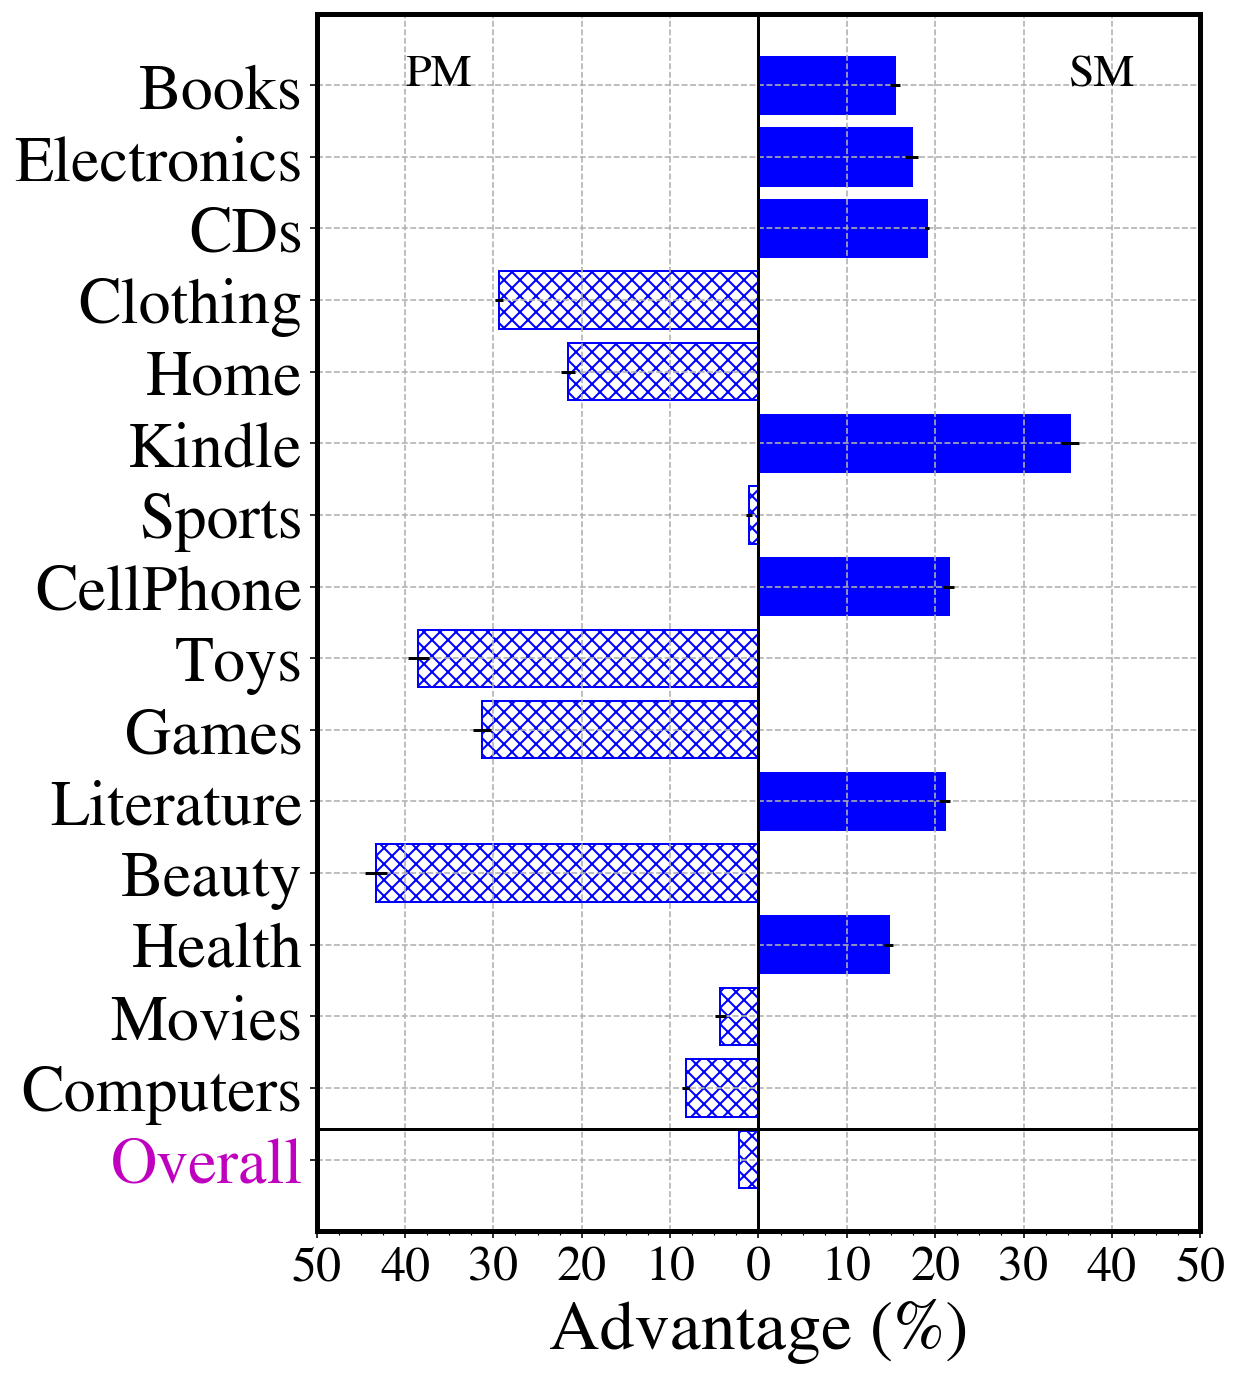

In [52]:
plotResults(val,'PM','SM',std_err=std_err,dir_='plotsBootstrap')

# Calculate covariate distribution

In [3]:
categories = ['Books','Electronics','CDs & Vinyl','Clothing, Shoes & Jewelry','Home & Kitchen',\
             'Kindle Store','Sports & Outdoors','Cell Phones & Accessories', 'Toys & Games','Games','Literature & Fiction',\
             'Beauty','Health & Personal Care','Movies','Computers']

In [5]:
category = 'Books'

In [59]:
path = 'category_pairs/sample_3/'+category+'.pickle'
with open(path,'rb') as fs:
    pairs = pickle.load(fs)

In [60]:
pairs.keys()

dict_keys(['0-1', '1-0', '0-2', '2-0', '0-3', '3-0', '1-2', '2-1', '1-3', '3-1', '2-3', '3-2'])

In [62]:
pairs['1-0'][0]

(Upvotes                        0
 Downvotes                      0
 Rating                         4
 Timestamp            1.36858e+09
 Review_length                 27
 Grade_level                    6
 overall_sentiment         0.8519
 categories           [Computers]
 group                          0
 Name: 5178899, dtype: object, Upvotes                        1
 Downvotes                      0
 Rating                         4
 Timestamp            1.36123e+09
 Review_length                 20
 Grade_level                    6
 overall_sentiment         0.8834
 categories           [Computers]
 group                          1
 Name: 5689263, dtype: object)

In [7]:
from scipy.stats import ks_2samp

In [140]:
def createDistribution(lst):
    u_el = list(set(lst))
    u_el.sort()
    dist = []
    for el in u_el:
        el_cnt = lst.count(el)
        dist.append(el_cnt)
    s = sum(dist)
    return u_el,[i/s for i in dist]

In [191]:
def calcCovariateHist(pairs,x_label=None,covariate=None):
    
    
    keys = ['0-1','1-0','2-3','3-2','1-3','3-1','0-2','2-0']
    
    confounder = {}
    
    
    for key in keys:
        for pair in pairs[key]:
            x = pair[0]['group']
            val_x = pair[0][covariate]
            y = pair[1]['group']
            val_y = pair[1][covariate]
            if x not in confounder:
                confounder[x] = []
            if y not in confounder:
                confounder[y] = []
            confounder[x].append(val_x)
            confounder[y].append(val_y)
    
    
    confounder_fil = {}
    confounder_fil[0] = [i for i in confounder[0] if i in range(1,16)]
    confounder_fil[1] = [i for i in confounder[1] if i in range(1,16)]
    confounder_fil[2] = [i for i in confounder[2] if i in range(1,16)]
    confounder_fil[3] = [i for i in confounder[3] if i in range(1,16)]
    
    print(min(confounder_fil[0]),max(confounder_fil[0]))
    print(min(confounder_fil[1]),max(confounder_fil[1]))
    print(min(confounder_fil[2]),max(confounder_fil[2]))
    print(min(confounder_fil[3]),max(confounder_fil[3]))
    
    
    
    width = 0.15
    fig, ax = plt.subplots()
    colors = ['b','r','b','r']
    edge_colors = [None,None,'b','r']
    #hatches = ['','','xxx','xxx']
    linestyles = ['-','-','--','--']
    fills = [True,True,False,False]
    labels = ['SM','SW','PM','PW']
    #x_pos = np.arange(1.5,60,step=10)
    #ax.set_xticks(x_pos)
    #ax.set_xticklabels([50,40,30,20,10,0,10,20,30,40,50])
    #print(min(confounder[0]),min(confounder[1]),min(confounder[2]),min(confounder[3]))
    for i in range(4):
        x,dist = createDistribution(confounder_fil[i])
        plt.plot(x,dist,color = colors[i],label = labels[i],linewidth=2,linestyle = linestyles[i])
        #x = [i*width+j for j in x]
        #plt.bar(x,dist,color=colors[i],hatch=hatches[i],fill=fills[i],label=labels[i],width=0.15,edgecolor=edge_colors[i])
    
    index = np.arange(1,16)
    plt.xticks(index + width*1.5, (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))
    plt.grid(linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel('PMF')
    plt.tight_layout()
    plt.savefig('plotCovariates/'+covariate+'.jpg',dpi=250)
    plt.legend()
    plt.show()
    

1.0 15.0
1.0 15.0
1.0 15.0
1.0 15.0


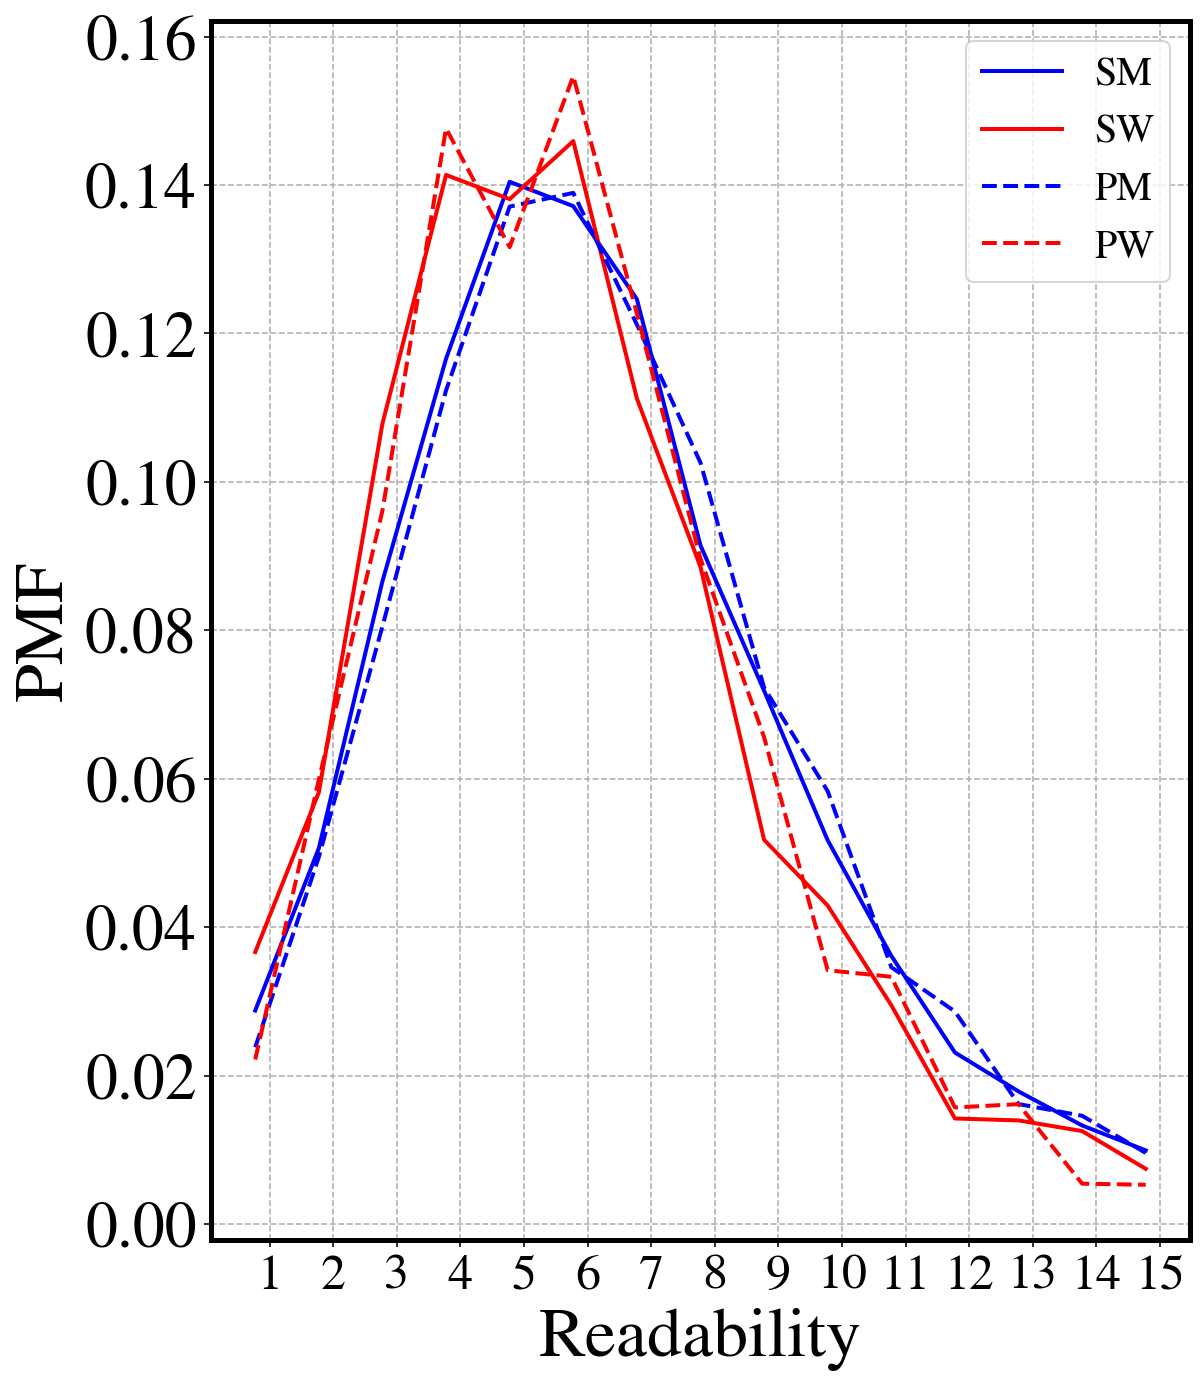

In [192]:
x = calcCovariateHist(pairs,x_label='Readability',covariate='Grade_level')

In [58]:
len(x)

3

In [21]:
def calcCovariateDist(pairs,t,x_label='Readability',covariate='Grade_level'):
    
    flag = 0
    dists_all = []
    for i in range(4):
        if i!=t:
            if flag==0:
                grp_0_1 = [(m[covariate],n[covariate]) for m,n in pairs[str(t)+'-'+str(i)]]
                #grp_1_0 = [(n[covariate],m[covariate]) for m,n in pairs[str(i)+'-'+str(t)]]
                #grp = grp_0_1 + grp_1_0
                dist = list(zip(*grp_0_1))
            
                dist_0 = list(dist[0])
                dists_all.append(list(dist[1]))
            
            else:
                dists_all.append([n[covariate] for m,n in pairs[str(t)+'-'+str(i)]])
                
            #val,p = ks_2samp(dist_0,dist_1)
            #print(val,p)
            #dist_0.sort()
            #dist_1.sort()
            #y_1 = np.cumsum(dist_0)
            #y_2 = np.cumsum(dist_1)
            
    #y,binEdges=np.histogram(dist_0,bins=100)
    #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    #plt.plot(bincenters,y,'-',linewidth=2)
    sns.distplot(dist_0,hist=False,rug=True,label='DM',kde_kws={'color':'b','linewidth':2})
    
    colors = ['r','b','r']
    ls = ['-','--','--']
    labels = ['DW','UM','UW']
    
    for i,dist in enumerate(dists_all):

        #y,binEdges=np.histogram(dist,bins=100)
        #bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        #plt.plot(bincenters,y,'-',linewidth=2)
        sns.distplot(dist,hist=False,rug=True,label=labels[i],
                     kde_kws={'color':colors[i],'linestyle':ls[i],'linewidth':2})

    plt.xlabel(x_label)
    plt.ylabel('PDF')
    plt.grid(linestyle='--')
    #plt.xscale('log')
    plt.tight_layout()
    plt.savefig('plotCovariates/'+covariate+'.jpg',dpi=250)
    
            
            
    

In [179]:
pairs['0-1'][100]

(Upvotes                                                              2
 Downvotes                                                            0
 Rating                                                               5
 Timestamp                                                   1.3182e+09
 Review_length                                                      416
 Grade_level                                                          8
 overall_sentiment                                               0.9698
 categories           [Toys & Games, Hobbies, Models & Model Kits, M...
 group                                                                0
 Name: 17370889, dtype: object,
 Upvotes                                                       125
 Downvotes                                                       0
 Rating                                                          5
 Timestamp                                             1.31337e+09
 Review_length                                      

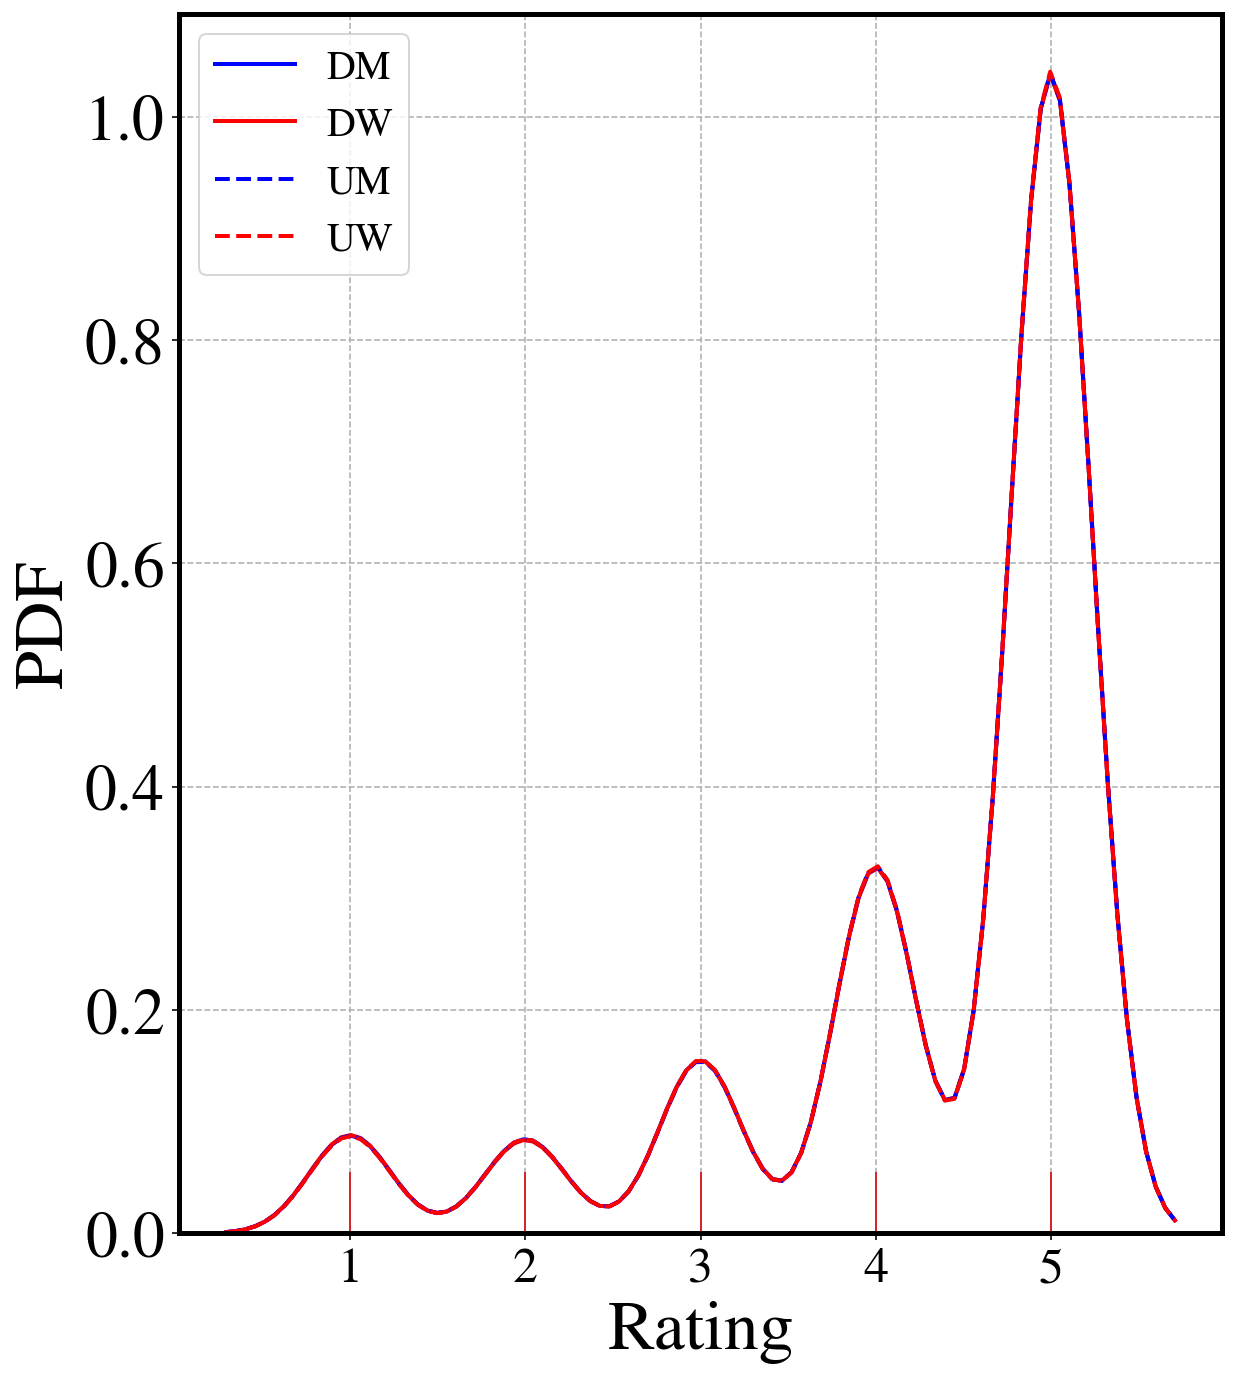

In [26]:
calcCovariateDist(pairs,0,x_label='Rating',covariate='Rating')

In [199]:
from scipy.stats import kruskal

In [203]:
d_m_s = dis_male.sample(1000000)

In [204]:
u_m_s = undis_male.sample(1000000)

In [205]:
d_f_s = dis_female.sample(1000000)

In [206]:
u_f_s = undis_female.sample(1000000)

In [209]:
kruskal(d_m_s['overall_sentiment'],u_m_s['overall_sentiment'],d_f_s['overall_sentiment'],u_f_s['overall_sentiment'])

KruskalResult(statistic=79577.3095196141, pvalue=0.0)

In [9]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib as mpl

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#mpl.style.use('classic')
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  9,10
mpl.rcParams['axes.labelsize'] = 35
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5

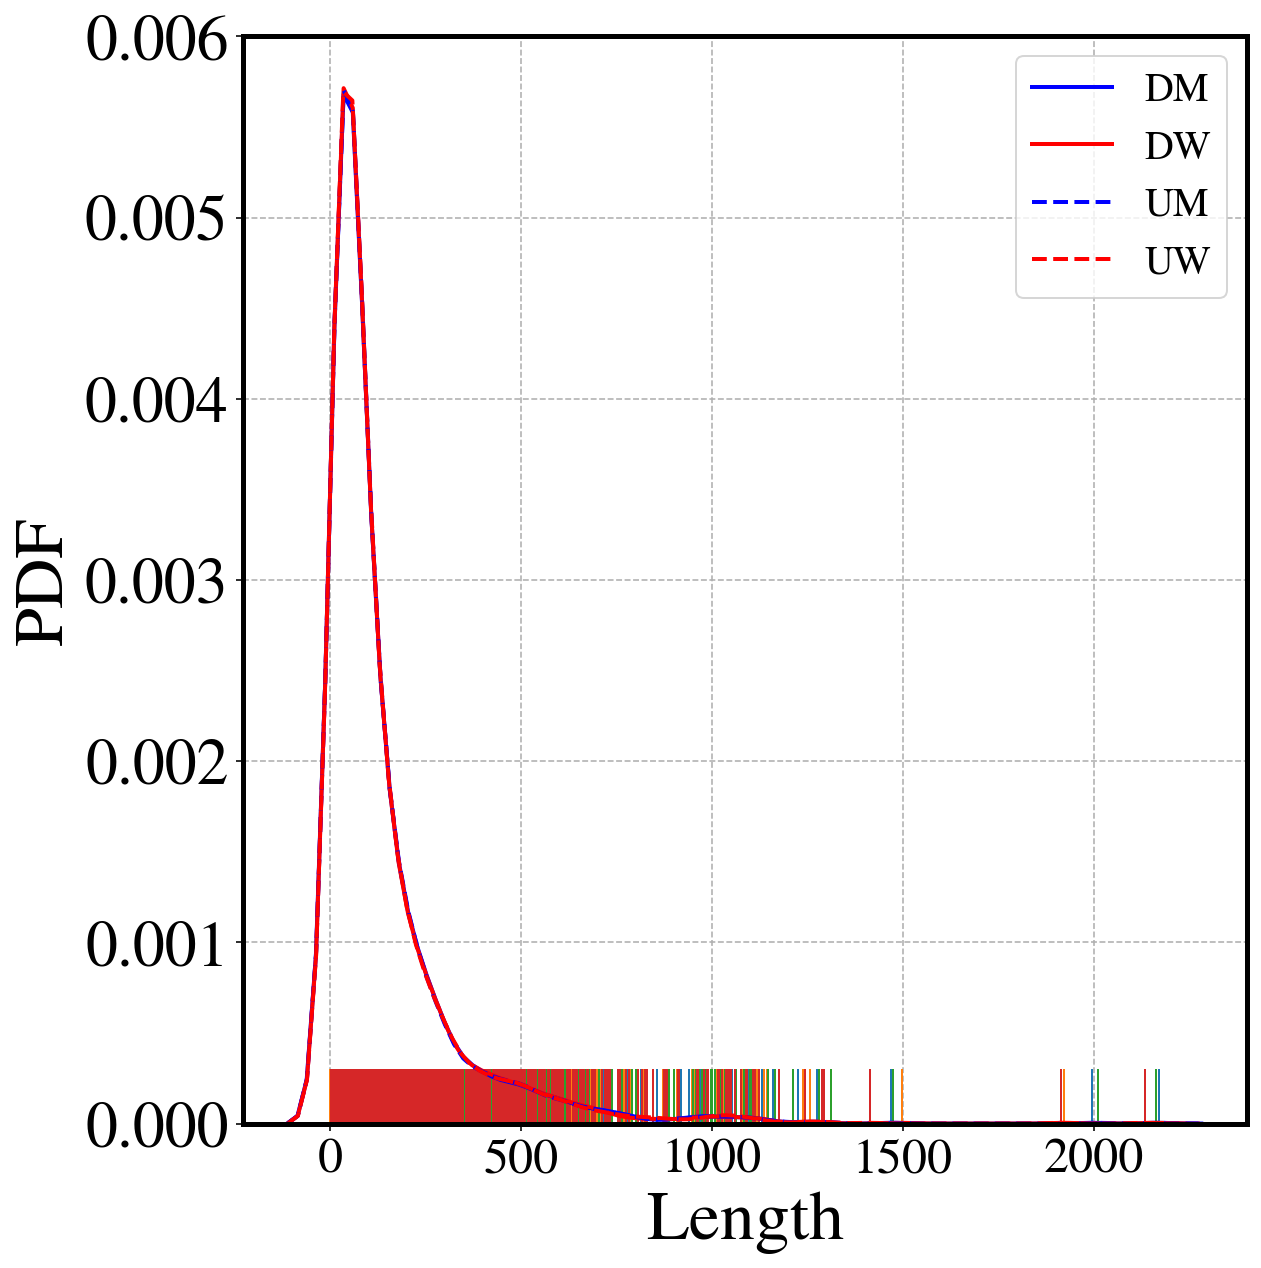

In [15]:
calcCovariateDist(pairs,0)

In [12]:
import seaborn as sns